In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Set font and fontsize globally
matplotlib.rcParams["font.family"] = "Arial"
matplotlib.rcParams["font.size"] = 11

# Results for pouring with cell culture flask

In [3]:
# read summary_flask_test_50_final.csv
results = pd.read_excel("results_flask_sim_to_reality.xlsx")
results.head()

,scene_number,path,rotationSpeed,stop_angle,pause_time,volume_start,volume_poured,volume_received,spilled_volume,real_poured_volume,real_received_volume,real_spilled_volume
0,1102,../../output/CellFlask/Flask_75_1799_4,0.03,4.0,1.8,72.3750,0.122500,0.010000,0.1125,0.0,0.0,0.0
1,2588,../../output/CellFlask/Flask_135_1399_26,0.03,26.0,1.4,130.5650,115.852501,107.027496,8.8250,125.0,124.0,1.0
2,1159,../../output/CellFlask/Flask_80_600_18,0.03,18.0,0.6,77.2650,38.947498,38.767502,0.1800,64.5,64.0,0.5
3,2827,../../output/CellFlask/Flask_145_1399_4,0.03,4.0,1.4,140.1000,0.402500,0.220000,0.1825,0.0,0.0,0.0
4,231,../../output/CellFlask/Flask_20_1799_12,0.03,12.0,1.8,19.5725,0.575000,0.510000,0.0650,0.0,0.0,0.0


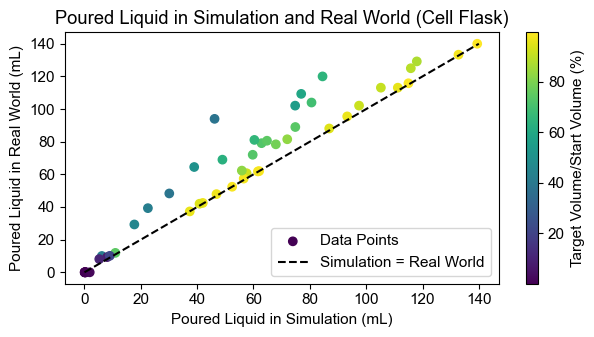

In [4]:
# make scatter plot of volume_poured vs real_poured_volume
plt.figure(figsize=(6.3, 3.5))
plt.scatter(
    results["volume_poured"],
    results["real_poured_volume"],
    c=results["volume_poured"] / results["volume_start"] * 100,
)
plt.xlabel("Poured Liquid in Simulation (mL)")
plt.ylabel("Poured Liquid in Real World (mL)")
# add diagonal line
plt.plot([0, 140], [0, 140], color="black", linestyle="--")

# add colorbar
colorbar = plt.colorbar()
colorbar.set_label("Target Volume/Start Volume (%)")
plt.title("Poured Liquid in Simulation and Real World (Cell Flask)")
plt.legend(["Data Points", "Simulation = Real World"], loc="lower right")
plt.tight_layout()
plt.savefig("Plots/results_flask_sim_to_reality.png", dpi=600)
# show plot
plt.show()

### Results of received volume

In [5]:
# calculate RMSE
RMSE = np.sqrt(
    np.mean((results["volume_received"] - results["real_received_volume"]) ** 2)
)
print("RMSE: ", RMSE.round(2), "mL")

# calculate mean percentage error
mean_percentage_error = np.mean(
    np.abs(
        (results["volume_received"]).astype(int)
        - (results["real_received_volume"]).astype(int)
    )
    / results["volume_received"]
)
print("Mean Percentage Error: ", mean_percentage_error.round(2) * 100, "%")

# calculate r2 score
r2 = r2_score(results["volume_received"], results["real_received_volume"])
print("R2 score: ", r2.round(2))

RMSE:  15.02 mL
Mean Percentage Error:  21.0 %
R2 score:  0.83


### Results of spilled volume

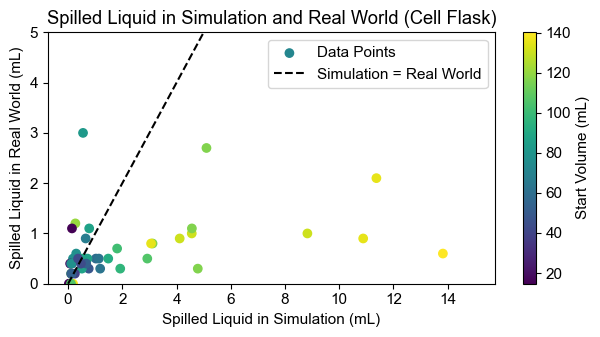

In [6]:
# make scatter plot of spilled volume in simulation vs real spilled volume with volume_start as color
plt.figure(figsize=(6.3, 3.5))
plt.scatter(
    results["spilled_volume"], results["real_spilled_volume"], c=results["volume_start"]
)
# plt.scatter(results['volume_poured'], results['real_poured_volume'])
plt.xlabel("Spilled Liquid in Simulation (mL)")
plt.ylabel("Spilled Liquid in Real World (mL)")
# add diagonal line
plt.plot([0, 15], [0, 15], color="black", linestyle="--")
plt.ylim(0, 5)
# add colorbar
colorbar = plt.colorbar()
colorbar.set_label("Start Volume (mL)")
plt.title("Spilled Liquid in Simulation and Real World (Cell Flask)")
plt.legend(["Data Points", "Simulation = Real World"], loc="upper right")
plt.tight_layout()
plt.savefig("Plots/results_flask_sim_to_reality_spilled.png", dpi=600)
# show plot
plt.show()

In [7]:
# calculate RMSE
RMSE = np.sqrt(
    np.mean((results["spilled_volume"] - results["real_spilled_volume"]) ** 2)
)
print("RMSE: ", RMSE.round(2), "mL")

# calculate mean percentage error
mean_percentage_error = np.mean(
    np.abs(
        (results["spilled_volume"]).astype(int)
        - (results["real_spilled_volume"]).astype(int)
    )
    / results["spilled_volume"]
)
print("Mean Percentage Error: ", mean_percentage_error.round(2) * 100, "%")

# calculate r2 score
r2 = r2_score(results["spilled_volume"], results["real_spilled_volume"])
print("R2 score: ", r2.round(2))

RMSE:  3.21 mL
Mean Percentage Error:  63.0 %
R2 score:  -0.06


# Results for pouring with media/washing solution bottle

In [8]:
# read summary_flask_test_50_final.csv
results = pd.read_excel("results_bottle_sim_to_reality.xlsx")
results.head()

,scene_number,path,rotationSpeed,stop_angle,pause_time,volume_start,volume_poured,volume_received,spilled_volume,real_poured_volume,real_received_volume,real_spilled_volume
0,258,../../output/MediumBottle/Medium_180_600_34,0.03,34.0,0.6,179.9350,0.0050,0.0025,0.0025,0.0,0.0,0.0
1,121,../../output/MediumBottle/Medium_50_1399_44,0.03,44.0,1.4,49.9950,0.0025,0.0000,0.0025,0.0,0.0,0.0
2,822,../../output/MediumBottle/Medium_90_1000_78,0.03,78.0,1.0,89.9825,13.0200,12.9850,0.0350,38.0,37.9,0.1
3,295,../../output/MediumBottle/Medium_60_1399_32,0.03,32.0,1.4,59.9900,0.0025,0.0000,0.0025,0.0,0.0,0.0
4,417,../../output/MediumBottle/Medium_70_600_60,0.03,60.0,0.6,69.9900,0.0600,0.0150,0.0450,0.0,0.0,0.0


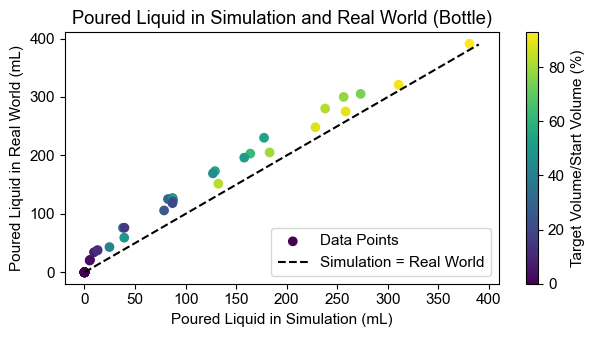

In [9]:
# make scatter plot of volume_poured vs real_poured_volume
plt.figure(figsize=(6.3, 3.5))
plt.scatter(
    results["volume_poured"],
    results["real_poured_volume"],
    c=results["volume_poured"] / results["volume_start"] * 100,
)
plt.xlabel("Poured Liquid in Simulation (mL)")
plt.ylabel("Poured Liquid in Real World (mL)")
# add diagonal line
plt.plot([0, 390], [0, 390], color="black", linestyle="--")

# add colorbar
colorbar = plt.colorbar()
colorbar.set_label("Target Volume/Start Volume (%)")
plt.title("Poured Liquid in Simulation and Real World (Bottle)")
plt.legend(["Data Points", "Simulation = Real World"], loc="lower right")
plt.tight_layout()
plt.savefig("Plots/results_bottle_sim_to_reality.png", dpi=600)
# show plot
plt.show()

In [36]:
diff = results["volume_poured"] - results["real_poured_volume"]

# get number of samples with positive difference
print("Number of samples with positive difference: ", len(diff[diff > 0]))
print("Mean of positive difference: ", diff[diff > 0].mean().round(2), "mL")
print("Max of positive difference: ", diff[diff > 0].max().round(2), "mL")

# get number of samples with negative difference
print("Number of samples with negative difference: ", len(diff[diff <= 0]))
print("Mean of negative difference: ", diff[diff <= 0].mean().round(2), "mL")
print("Min of negative difference: ", diff[diff <= 0].min().round(2), "mL")

# get number of samples with zero difference
print("Number of samples with zero difference: ", len(diff[diff == 0]))

Number of samples with positive difference:  19
Mean of positive difference:  0.01 mL
Max of positive difference:  0.06 mL
Number of samples with negative difference:  31
Mean of negative difference:  -29.21 mL
Min of negative difference:  -52.63 mL
Number of samples with zero difference:  1


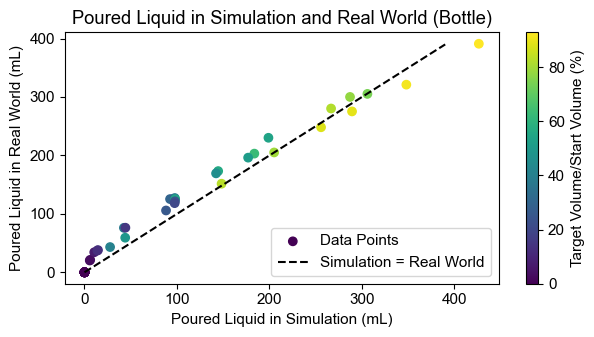

In [29]:
# make scatter plot of volume_poured vs real_poured_volume
plt.figure(figsize=(6.3, 3.5))
plt.scatter(
    results["volume_poured"] * 1.12,
    results["real_poured_volume"],
    c=results["volume_poured"] / results["volume_start"] * 100,
)
plt.xlabel("Poured Liquid in Simulation (mL)")
plt.ylabel("Poured Liquid in Real World (mL)")
# add diagonal line
plt.plot([0, 390], [0, 390], color="black", linestyle="--")

# add colorbar
colorbar = plt.colorbar()
colorbar.set_label("Target Volume/Start Volume (%)")
plt.title("Poured Liquid in Simulation and Real World (Bottle)")
plt.legend(["Data Points", "Simulation = Real World"], loc="lower right")
plt.tight_layout()
# show plot
plt.show()

### Results of received volume

In [30]:
# calculate RMSE
RMSE = np.sqrt(
    np.mean((results["volume_received"] - results["real_received_volume"]) ** 2)
)
print("RMSE: ", RMSE.round(2), "mL")

# calculate mean percentage error
mean_percentage_error = np.mean(
    np.abs(
        (results["volume_received"]).astype(int)
        - (results["real_received_volume"]).astype(int)
    )
    / results["volume_received"]
)
print("Mean Percentage Error: ", mean_percentage_error.round(2) * 100, "%")

# calculate r2 score
r2 = r2_score(results["volume_received"], results["real_received_volume"])
print("R2 score: ", r2.round(2))

RMSE:  31.84 mL
Mean Percentage Error:  53.0 %
R2 score:  0.88


In [25]:
# find best correction factor
best_correction_factor = 1.0
best_RMSE = 1000
i = 1.05
while i < 2.0:
    RMSE = np.sqrt(
        np.mean((results["volume_received"] * i - results["real_received_volume"]) ** 2)
    )
    if RMSE < best_RMSE:
        best_RMSE = RMSE
        best_correction_factor = i
    i += 0.01
print("Best correction factor: ", round(best_correction_factor, 2))

Best correction factor:  1.23


### Results of spilled volume

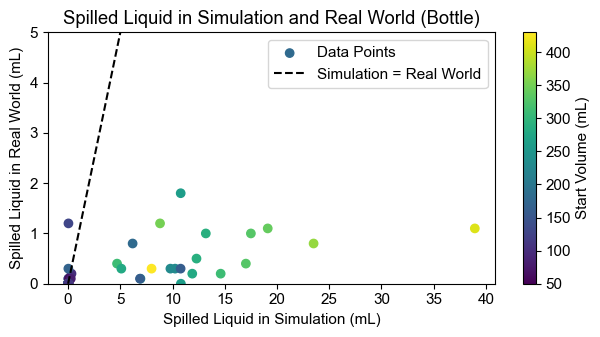

In [14]:
# make scatter plot of spilled volume in simulation vs real spilled volume with volume_start as color
plt.figure(figsize=(6.3, 3.5))
plt.scatter(
    results["spilled_volume"], results["real_spilled_volume"], c=results["volume_start"]
)
# plt.scatter(results['volume_poured'], results['real_poured_volume'])
plt.xlabel("Spilled Liquid in Simulation (mL)")
plt.ylabel("Spilled Liquid in Real World (mL)")
# add diagonal line
plt.plot([0, 15], [0, 15], color="black", linestyle="--")
plt.ylim(0, 5)
# add colorbar
colorbar = plt.colorbar()
colorbar.set_label("Start Volume (mL)")
plt.title("Spilled Liquid in Simulation and Real World (Bottle)")
plt.legend(["Data Points", "Simulation = Real World"], loc="upper right")
plt.tight_layout()
plt.savefig("Plots/results_bottle_sim_to_reality_spilled.png", dpi=600)
# show plot
plt.show()

In [15]:
# calculate RMSE
RMSE = np.sqrt(
    np.mean((results["spilled_volume"] - results["real_spilled_volume"]) ** 2)
)
print("RMSE: ", RMSE.round(2), "mL")

# calculate mean percentage error
mean_percentage_error = np.mean(
    np.abs(
        (results["spilled_volume"]).astype(int)
        - (results["real_spilled_volume"]).astype(int)
    )
    / results["spilled_volume"]
)
print("Mean Percentage Error: ", mean_percentage_error.round(2) * 100, "%")

# calculate r2 score
r2 = r2_score(results["spilled_volume"], results["real_spilled_volume"])
print("R2 score: ", r2.round(2))

RMSE:  9.2 mL
Mean Percentage Error:  111.00000000000001 %
R2 score:  -0.34


In [35]:
diff = results["spilled_volume"] - results["real_spilled_volume"]

# get number of samples with positive difference
print("Number of samples with positive difference: ", len(diff[diff > 0]))
print("Mean of positive difference: ", diff[diff > 0].mean().round(2), "mL")
print("Max of positive difference: ", diff[diff > 0].max().round(2), "mL")

# get number of samples with negative difference
print("Number of samples with negative difference: ", len(diff[diff <= 0]))
print("Mean of negative difference: ", diff[diff <= 0].mean().round(2), "mL")
print("Min of negative difference: ", diff[diff <= 0].min().round(2), "mL")

# get number of samples with zero difference
print("Number of samples with zero difference: ", len(diff[diff == 0]))

Number of samples with positive difference:  40
Mean of positive difference:  6.38 mL
Max of positive difference:  37.84 mL
Number of samples with negative difference:  10
Mean of negative difference:  -0.16 mL
Min of negative difference:  -1.17 mL
Number of samples with zero difference:  5
